In [1]:
from __future__ import division, print_function
from tf_unet import util,unet,image_util,image_gen
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
import numpy as np
plt.rcParams['image.cmap']='gray'

In [2]:
net=unet.Unet(channels=3, n_class=2, layers=4, features_root=64)

2019-07-15 21:49:31,049 Layers 4, features 64, filter size 3x3, pool size: 2x2


Instructions for updating:
Colocations handled automatically by placer.


2019-07-15 21:49:31,078 From D:\soft\ANACONDA\lib\site-packages\tensorflow\python\framework\op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2019-07-15 21:49:31,097 From C:\Users\yzw81\Desktop\DL\tf_unet\layers.py:40: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use keras.layers.batch_normalization instead.


2019-07-15 21:49:31,108 From C:\Users\yzw81\Desktop\DL\tf_unet\unet.py:95: batch_normalization (from tensorflow.python.layers.normalization) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.batch_normalization instead.


ValueError: input channels does not match filter's input channels, 512 != 1024

In [3]:
data_provider=image_util.ImageDataProvider("F:/GRAYdata/*.tif")
trainer = unet.Trainer(net,optimizer="momentum", opt_kwargs=dict(momentum=0.2))
print(data_provider(1)[1].shape)
path=trainer.train(data_provider,"../output",training_iters=32,epochs=10,display_step=2)

Number of files used: 138
Number of channels: 3
Number of classes: 2


NameError: name 'net' is not defined

In [5]:
#data=imageio.imread("D:/DATAset/mass_buildings/Validation/sat/0_23579050_15.tiff")

x_test,y_test=data_provider(1)
print(x_test.shape)
prediction=net.predict(path,x_test)
print(prediction.shape)

print(prediction)

(1, 256, 256, 3)
Instructions for updating:
Use standard file APIs to check for files with this prefix.


2019-07-15 21:14:44,028 From D:\soft\ANACONDA\lib\site-packages\tensorflow\python\training\saver.py:1266: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from ../output\model.ckpt


2019-07-15 21:14:44,032 Restoring parameters from ../output\model.ckpt
2019-07-15 21:14:44,368 Model restored from file: ../output\model.ckpt


(1, 256, 256, 2)
[[[[9.6923143e-01 3.0768611e-02]
   [9.9669564e-01 3.3044147e-03]
   [9.9877876e-01 1.2212348e-03]
   ...
   [9.9902010e-01 9.7989163e-04]
   [9.9794823e-01 2.0517479e-03]
   [9.7936237e-01 2.0637643e-02]]

  [[9.9581283e-01 4.1871122e-03]
   [9.9986398e-01 1.3601326e-04]
   [9.9995816e-01 4.1896157e-05]
   ...
   [9.9995971e-01 4.0286403e-05]
   [9.9984539e-01 1.5458565e-04]
   [9.9043590e-01 9.5640598e-03]]

  [[9.9817586e-01 1.8241892e-03]
   [9.9995685e-01 4.3171814e-05]
   [9.9997866e-01 2.1284355e-05]
   ...
   [9.9997234e-01 2.7689317e-05]
   [9.9987841e-01 1.2158559e-04]
   [9.8544967e-01 1.4550265e-02]]

  ...

  [[9.9647552e-01 3.5245102e-03]
   [9.9974471e-01 2.5529225e-04]
   [9.9983370e-01 1.6631054e-04]
   ...
   [9.9993956e-01 6.0481601e-05]
   [9.9982375e-01 1.7626178e-04]
   [9.8317325e-01 1.6826745e-02]]

  [[9.9475116e-01 5.2489182e-03]
   [9.9947590e-01 5.2412500e-04]
   [9.9963617e-01 3.6383487e-04]
   ...
   [9.9977773e-01 2.2231310e-04]
   [9.994

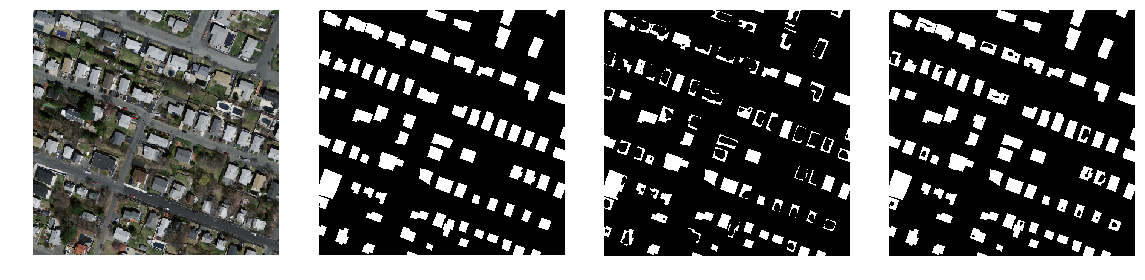

In [6]:
fig, ax = plt.subplots(1, 4, figsize=(16,4))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
ax[0].imshow(x_test[0,...])
ax[0].axis('off')
ax[1].imshow(y_test[0,...,1])
ax[1].axis('off')
mask = prediction[0,...,0] >0.0035
mask2 = prediction[0,...,0] >0.000001
ax[2].imshow(mask*y_test[0,...,1], aspect="auto")
ax[2].axis('off')
ax[3].imshow(mask2*y_test[0,...,1], aspect="auto")
#ax[2].imshow(256*prediction[0,...,0])
ax[3].axis('off')
#ax[0].set_title("Input")
#ax[1].set_title("Ground truth")
#ax[2].set_title("Unet")
#ax[3].set_title("ResUnet")

fig.tight_layout()
fig.savefig("../output/toy_problem.png")
util.save_image(255*mask, "../output/label.tif")

# preparing data loading
data_provider=image_util.ImageDataProvider("D:/data/*.tif")
#setup&training
net=unet.Unet(layers=3,features_root=64,channels=3,n_class=3)
trainer=unet.Trainer(net)
output_path="../output"
path=trainer.train(data_provider,output_path,training_iters=32,epochs=100)
#verification

data,label=data_provider(1)
prediction=net.predict("../output/model.ckpt",data)
unet.error_rate(prediction,util.crop_to_shape(label,prediction.shape))

img=util.combine_img_prediction(data,label,prediction)
util.save_image(img,"prediction.tif")

In [ ]:
for index, file_path in enumerate(validation_path):
    validation_image=cv2.imread(file_path)
    sample_image=np.asarray(a=validation_image[:,:,0],dtype=np.unit8)
    sample_image=cv2.resize(src=sample_image,dsize=(INPUT_IMG_WIDE,INPUT_IMG_HEIGHT))
    label_image=np.asarray(validation_image[:,:,2],dtype=np.uint8)
    label_image=cv2.resize(src=label_image,dsize=(OUTPUT_IMG_WIDE,OUTPUT_IMG_HEIGHT))
    label_image[label_image<100]=0
    label_image[label_image>100]=10
    example=tf.train.Example(features=tf.train.Features(festure={
        'label': tf.train.Feature(bytes_list=tf.train.BytesList(value=[label_image.tobytes()]))
        'image_raw':tf.train.Feature(bytes_list=tf.train.BytesList(value=[sample_image.tobytes]))
    }))
    validation_set_write.write(example.SerializeToString())
    if index % 100 ==0:
        print('Done train_set writing %.2f%%'% (index / train_set_size*100))
validation_set_writer.close()
print('Done validation_set writing')
@staticmethod

In [ ]:
def batch_normal(x, is_training, eps=EPS, decay=0.9, affine=True, name-'BatchNorm2d'):
    from tensorflow.python.training.moving_averages import assign_moving_average
    
    with tf.variable_scope(name):
        params_shape = x.shape[-1:]
        moving_mean =tf.get_variable(name-'mean',shape=params_shape,initializer=tf.zeros_initializer,trainable=False)
        moving_var-tf.get_variable(name='variance',shape=params_shape,intializer=tf.ones_initializer,trainable=False)
        
        def mean_var_with_update():
            mean_this_batch,variance_this_batch = tf.nn.moments(x, list(range(len(x:shape) - 1)),name='moments')
            with tf.control_dependencies([
                assign_moving_average(moving_mean, mean_this_batch, decay),
                assign_moving_average(moving_var, variance_this_batch, decay)
            ]):
                return tf.identity(mean_this_batch),tf.identity(variance_this_batch)
        mean, variance =tf.cond(is_training, mean_var_with_update, lambda: (moving_mean, moving_var))
        if affine:
            beta = tf.get_variable('beta', params_shape, initializer=tf.zero_initializer)
            gamma = tf.get_variable('gamma', params_shape, initializer=tf.ones_initializer)
            normed = tf.nn.batch_normalization(x, mean=mean, variance=variance, offset=beta, scale=gamma, variance_epsilon=eps)
        else:
            normed = tf.nn.batch_normalization(x, mean=mean, variance=variance, offset=None, scale=None, variance_epsilon=eps)
        return normed

In [ ]:
import matplotlib.pyplot as plt
plt.savefig(path, )